<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Historical_Price_of_computer_memory_and_storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# unzip the file /content/historical-cost-of-computer-memory-and-storage.zip

!unzip /content/historical-cost-of-computer-memory-and-storage.zip -d /content/


Archive:  /content/historical-cost-of-computer-memory-and-storage.zip
  inflating: /content/historical-cost-of-computer-memory-and-storage.metadata.json  
  inflating: /content/historical-cost-of-computer-memory-and-storage.csv  
  inflating: /content/readme.md      


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
file_path = '/content/historical-cost-of-computer-memory-and-storage.csv'

try:
  df = pd.read_csv(file_path)
  print(df.head())  # Print the first few rows of the DataFrame
except FileNotFoundError:
  print(f"Error: File '{file_path}' not found. Please check the file path.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


  Entity      Code  Year  Historical price of memory  \
0  World  OWID_WRL  1957                3.786967e+15   
1  World  OWID_WRL  1959                6.032806e+14   
2  World  OWID_WRL  1960                4.588051e+13   
3  World  OWID_WRL  1965                2.170492e+13   
4  World  OWID_WRL  1970                4.892936e+12   

   Historical price of flash memory  Historical price of disk drives  \
0                               NaN                              NaN   
1                               NaN                     6.747736e+10   
2                               NaN                     3.150364e+10   
3                               NaN                              NaN   
4                               NaN                     1.731185e+09   

   Historical price of solid-state drives  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4         

In [5]:
df.head()

,Entity,Code,Year,Historical price of memory,Historical price of flash memory,Historical price of disk drives,Historical price of solid-state drives
0,World,OWID_WRL,1957,3.786967e+15,NaN,NaN,NaN
1,World,OWID_WRL,1959,6.032806e+14,NaN,6.747736e+10,NaN
2,World,OWID_WRL,1960,4.588051e+13,NaN,3.150364e+10,NaN
3,World,OWID_WRL,1965,2.170492e+13,NaN,NaN,NaN
4,World,OWID_WRL,1970,4.892936e+12,NaN,1.731185e+09,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Entity                                  59 non-null     object 
 1   Code                                    59 non-null     object 
 2   Year                                    59 non-null     int64  
 3   Historical price of memory              56 non-null     float64
 4   Historical price of flash memory        15 non-null     float64
 5   Historical price of disk drives         54 non-null     float64
 6   Historical price of solid-state drives  11 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ KB


In [8]:
# Finding the number of null values in each column
df.isnull().sum()

,0
Entity,0
Code,0
Year,0
Historical price of memory,3
Historical price of flash memory,44
Historical price of disk drives,5
Historical price of solid-state drives,48


In [10]:
df.shape

(59, 7)

In [11]:
# Dropping the columns "Historical price of flash memory" and "Historical price of solid-state drives" since it has too many missing values out of 59 raws
df_cleaned = df.drop(['Historical price of flash memory', 'Historical price of solid-state drives'], axis=1)
df_cleaned.head()


,Entity,Code,Year,Historical price of memory,Historical price of disk drives
0,World,OWID_WRL,1957,3.786967e+15,NaN
1,World,OWID_WRL,1959,6.032806e+14,6.747736e+10
2,World,OWID_WRL,1960,4.588051e+13,3.150364e+10
3,World,OWID_WRL,1965,2.170492e+13,NaN
4,World,OWID_WRL,1970,4.892936e+12,1.731185e+09


In [12]:
df_cleaned.isnull().sum()

,0
Entity,0
Code,0
Year,0
Historical price of memory,3
Historical price of disk drives,5


In [17]:
# Now drop the rows with null values
df_cleaned.dropna(inplace=True)
df_cleaned.head()

,Entity,Code,Year,Historical price of memory,Historical price of disk drives
1,World,OWID_WRL,1959,6.032806e+14,6.747736e+10
2,World,OWID_WRL,1960,4.588051e+13,3.150364e+10
4,World,OWID_WRL,1970,4.892936e+12,1.731185e+09
5,World,OWID_WRL,1973,2.327902e+12,1.513812e+09
6,World,OWID_WRL,1974,1.651140e+12,9.710340e+08


In [16]:
df_cleaned.isnull().sum()

,0
Entity,0
Code,0
Year,0
Historical price of memory,0
Historical price of disk drives,0


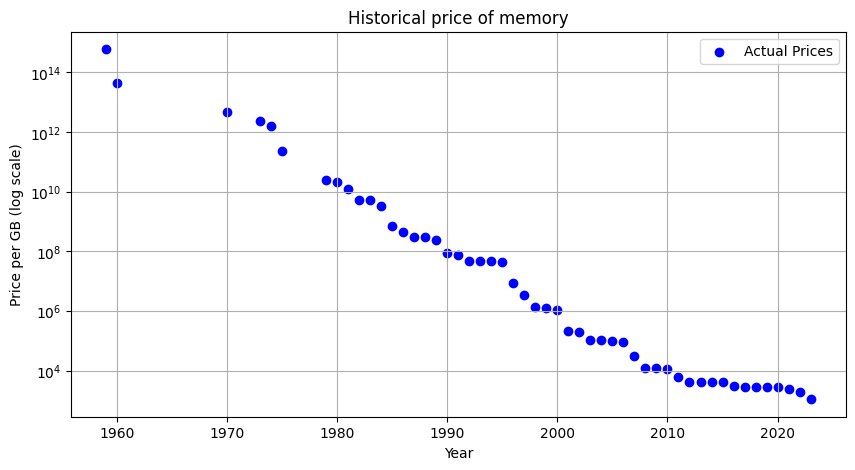

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['Year'], df_cleaned['Historical price of memory'], color='blue', label='Actual Prices')
plt.yscale('log')  # Log scale due to exponential decline
plt.xlabel("Year")
plt.ylabel("Price per GB (log scale)")
plt.title("Historical price of memory")
plt.legend()
plt.grid(True)
plt.show()


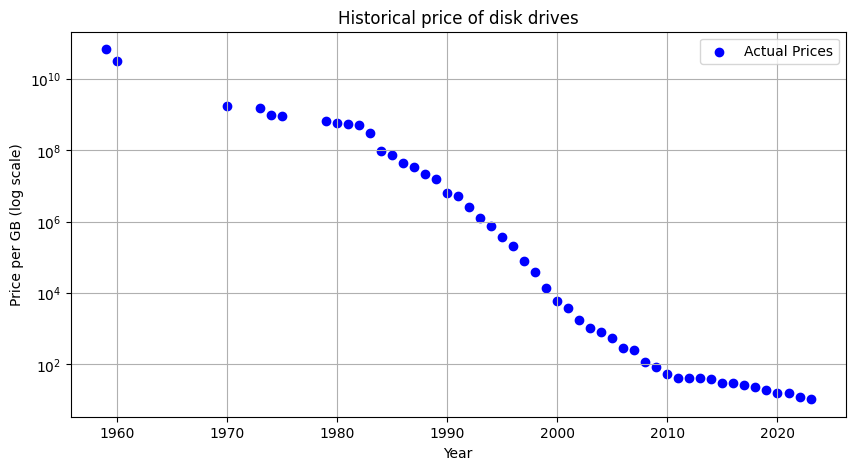

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['Year'], df_cleaned['Historical price of disk drives'], color='blue', label='Actual Prices')
plt.yscale('log')  # Log scale due to exponential decline
plt.xlabel("Year")
plt.ylabel("Price per GB (log scale)")
plt.title("Historical price of disk drives")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Log-transform the price
X = df_cleaned[['Year']]
y = np.log10(df_cleaned['Historical price of memory'])

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [26]:
# price of memory 5 years from now 2030

future_year = 2030
future_year_np = np.array([[future_year]])
log_prediction = model.predict(future_year_np)
predicted_price = 10 ** log_prediction[0]

print(f"Predicted price per GB of memory in {future_year}: ${predicted_price:.10f}")


Predicted price per GB of memory in 2030: $4.2707147053


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**What will disk prices be in 25 or 50 years?**

In [27]:
# Fit the Historical price of disk drives in to a Linear Regresion model
# Log-transform the price
X = df_cleaned[['Year']]
y = np.log10(df_cleaned['Historical price of disk drives'])

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
# Predict disk prices in 25 and 50 years

future_year_25 = 2025 + 25
future_year_50 = 2025 + 50

future_year_25_np = np.array([[future_year_25]])
future_year_50_np = np.array([[future_year_50]])

log_prediction_25 = model.predict(future_year_25_np)
predicted_price_25 = 10 ** log_prediction_25[0]

log_prediction_50 = model.predict(future_year_50_np)
predicted_price_50 = 10 ** log_prediction_50[0]

print(f"Predicted price per GB of disk drives in {future_year_25}: ${predicted_price_25:.10f}")
print(f"Predicted price per GB of disk drives in {future_year_50}: ${predicted_price_50:.10f}")


Predicted price per GB of disk drives in 2050: $0.0000132349
Predicted price per GB of disk drives in 2075: $0.0000000003


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
